In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale

In [2]:
iris = load_iris()

In [3]:
import random
import pandas as pd

In [4]:
features = ['sl','sw','pl','pw']
target = ['class_0', 'class_1', 'class_2']
df = pd.DataFrame(iris.data, columns=features)
df['class'] = iris.target
df = df.join(pd.get_dummies(df['class'], prefix='class'))
df = df.drop('class', axis=1)
df.head()

,sl,sw,pl,pw,class_0,class_1,class_2
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [5]:
df_shuffled = df.sample(frac=1)

df_len = len(df_shuffled)

amount_train = df_len*0.8
amount_test = df_len - amount_train

X_train = df_shuffled.loc[:amount_train, features]
y_train = df_shuffled.loc[:amount_train, target]
X_test = df_shuffled.loc[amount_train:, features]
y_test = df_shuffled.loc[amount_train:, target]

print(y_train)


     class_0  class_1  class_2
121        0        0        1
83         0        1        0
141        0        0        1
26         1        0        0
69         0        1        0
..       ...      ...      ...
37         1        0        0
28         1        0        0
129        0        0        1
13         1        0        0
120        0        0        1

[112 rows x 3 columns]


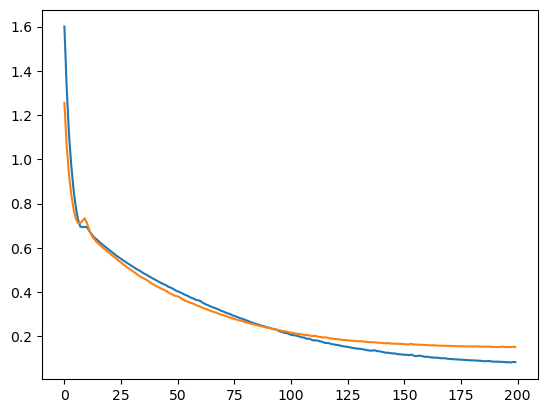

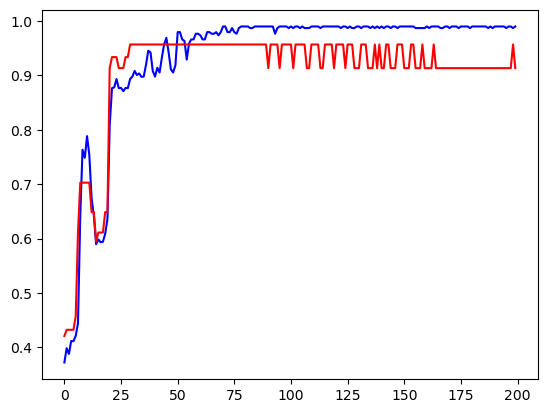

2/2 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.9487 - f1_score: 0.9129
[0.10846485197544098, 0.9487179517745972, 0.912946343421936]


In [6]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

adam = Adam(learning_rate=0.01)
model.compile(
    optimizer=adam, 
    loss='categorical_crossentropy', 
    metrics=['accuracy', f1_score])

h = model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=0)
history = h.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.show()

plt.plot(history['f1_score'],'b')
plt.plot(history['val_f1_score'],'r')
plt.show()

print(model.evaluate(X_test, y_test))



In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9487179487179487


In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9743589743589743


c:\Users\usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
print(clf.score(X_test, y_test))


0.9487179487179487
